In [1]:
import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Change %
0,"Mar 08, 2023","1,561.79","1,569.70","1,548.98","1,553.49",498.57K,-0.53%
1,"Mar 07, 2023","1,565.84","1,580.95","1,536.31","1,561.78",460.10K,-0.26%
2,"Mar 06, 2023","1,564.36","1,581.13","1,555.43","1,565.84",322.16K,0.09%
3,"Mar 05, 2023","1,566.73","1,587.95","1,556.84","1,564.37",313.01K,-0.15%
4,"Mar 04, 2023","1,569.45","1,577.02","1,550.10","1,566.73",247.02K,-0.14%


In [4]:
def month(m):
    if m=="Jan":
        return "1"
    elif m=="Feb":
        return "2"
    elif m=="Mar":
        return "3"
    elif m=="Apr":
        return "4"
    elif m=="May":
        return "5"
    elif m=="Jun":
        return "6"
    elif m=="Jul":
        return "7"
    elif m=="Aug":
        return "8"
    elif m=="Sep":
        return "9"
    elif m=="Oct":
        return "10"
    elif m=="Nov":
        return "11"
    elif m=="Dec":
        return "12"

In [5]:
j=0
for i in df['Volume']:
    if i[-1]=='K':
        df['Volume'][j]=round(float(i[:-1])*1000)
    elif i[-1]=="M":
        df['Volume'][j]=round(float(i[:-1])*1000000)
    elif i[-1]=="B":
        df['Volume'][j]=round(float(i[:-1])*1000000000)
    j+=1

In [6]:
for i in range(2555):
    j=df["Close"][i]
    if ',' in j:
        j=j.split(',')
        j="".join(j)
    j=float(j)
    df['Close'][i]=j
    j=df["High"][i]
    if ',' in j:
        j=j.split(',')
        j="".join(j)
    j=float(j)
    df['High'][i]=j
    j=df["Open"][i]
    if ',' in j:
        j=j.split(',')
        j="".join(j)
    j=float(j)
    df['Open'][i]=j
    j=df["Low"][i]
    if ',' in j:
        j=j.split(',')
        j="".join(j)
    j=float(j)
    df['Low'][i]=j
    j=df['Date'][i]
    j=j.split()
    j[0]=month(j[0])
    j[1]=j[1][:-1]
    j="/".join(j)
    df["Date"][i]=j
df.head()

,Date,Open,High,Low,Close,Volume,Change %
0,3/08/2023,1561.79,1569.7,1548.98,1553.49,498570,-0.53%
1,3/07/2023,1565.84,1580.95,1536.31,1561.78,460100,-0.26%
2,3/06/2023,1564.36,1581.13,1555.43,1565.84,322160,0.09%
3,3/05/2023,1566.73,1587.95,1556.84,1564.37,313010,-0.15%
4,3/04/2023,1569.45,1577.02,1550.1,1566.73,247020,-0.14%


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Close']=df['Close'].astype("float")
df['Open']=df['Open'].astype("float")
df['High']=df['High'].astype("float")
df['Low']=df['Low'].astype("float")
df.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Change %            object
dtype: object

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Change %
0,2023-03-08,1561.79,1569.70,1548.98,1553.49,498570,-0.53%
1,2023-03-07,1565.84,1580.95,1536.31,1561.78,460100,-0.26%
2,2023-03-06,1564.36,1581.13,1555.43,1565.84,322160,0.09%
3,2023-03-05,1566.73,1587.95,1556.84,1564.37,313010,-0.15%
4,2023-03-04,1569.45,1577.02,1550.10,1566.73,247020,-0.14%


In [9]:
df.set_index(['Date'],inplace=True)
df.head()

,Open,High,Low,Close,Volume,Change %
Date,,,,,,
2023-03-08,1561.79,1569.70,1548.98,1553.49,498570,-0.53%
2023-03-07,1565.84,1580.95,1536.31,1561.78,460100,-0.26%
2023-03-06,1564.36,1581.13,1555.43,1565.84,322160,0.09%
2023-03-05,1566.73,1587.95,1556.84,1564.37,313010,-0.15%
2023-03-04,1569.45,1577.02,1550.10,1566.73,247020,-0.14%


In [10]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,200), window_size=10)

C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The resul

info {'total_reward': -52.76000000000067, 'total_profit': 0.4471174604509542, 'position': 0}


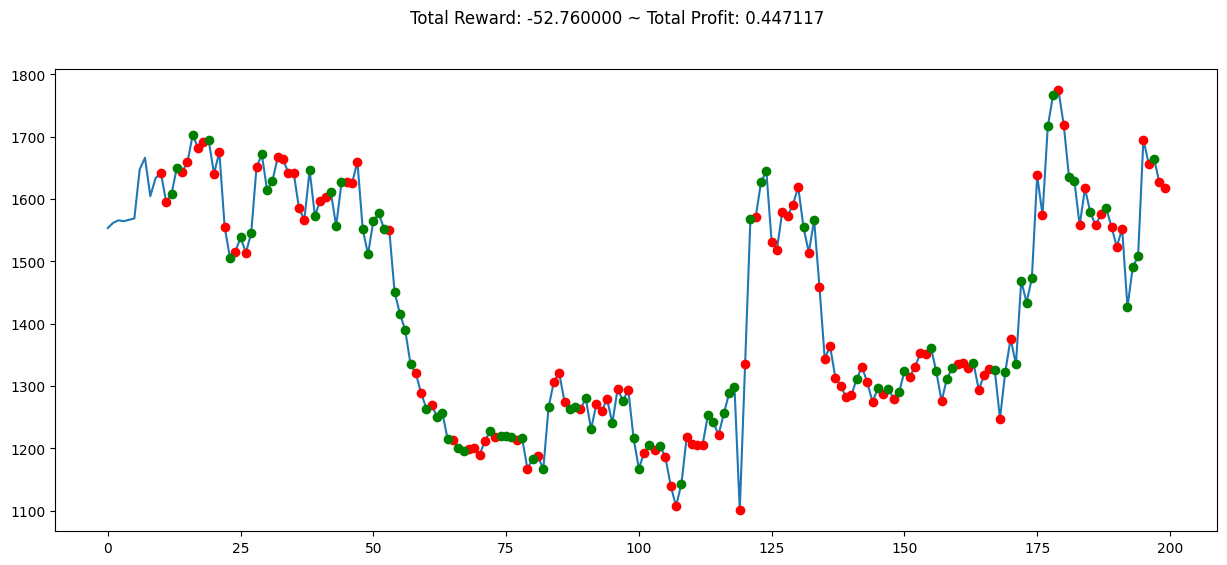

In [11]:
state=env.reset()
while True:
    action=env.action_space.sample()
    n_state,reward,done,info=env.step(action)
    if done:
        print("info",info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
env_maker=lambda: gym.make('stocks-v0',df=df, frame_bound=(10,200),window_size=10)
env=DummyVecEnv([env_maker])

In [13]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
C:\Users\Likhith Chakravarthi\anaconda3\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:196: UserWarning: WARN: The resul

---------------------------------
| explained_variance | -72.5    |
| fps                | 15       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000186 |
---------------------------------
---------------------------------
| explained_variance | -108     |
| fps                | 239      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 3.73e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.000246 |
| fps                | 270      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 1.03e+03 |
---------------------------------
---------------------------------
| explained_variance | -25.4    |
| fps                | 285      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

----------------------------------
| explained_variance | -9.62e-05 |
| fps                | 309       |
| nupdates           | 3000      |
| policy_entropy     | 0.237     |
| total_timesteps    | 15000     |
| value_loss         | 8.87e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.935    |
| fps                | 310      |
| nupdates           | 3100     |
| policy_entropy     | 0.257    |
| total_timesteps    | 15500    |
| value_loss         | 0.000495 |
---------------------------------
---------------------------------
| explained_variance | -62.6    |
| fps                | 311      |
| nupdates           | 3200     |
| policy_entropy     | 0.181    |
| total_timesteps    | 16000    |
| value_loss         | 0.000191 |
---------------------------------
---------------------------------
| explained_variance | 0.0011   |
| fps                | 312      |
| nupdates           | 3300     |
| policy_entropy     | 0.08     |
| tota

---------------------------------
| explained_variance | -0.0724  |
| fps                | 315      |
| nupdates           | 6100     |
| policy_entropy     | 0.00182  |
| total_timesteps    | 30500    |
| value_loss         | 6.89e-09 |
---------------------------------
---------------------------------
| explained_variance | -561     |
| fps                | 316      |
| nupdates           | 6200     |
| policy_entropy     | 0.0203   |
| total_timesteps    | 31000    |
| value_loss         | 0.000507 |
---------------------------------
----------------------------------
| explained_variance | -1.69e+04 |
| fps                | 316       |
| nupdates           | 6300      |
| policy_entropy     | 0.002     |
| total_timesteps    | 31500     |
| value_loss         | 2.78e-06  |
----------------------------------
---------------------------------
| explained_variance | -13      |
| fps                | 316      |
| nupdates           | 6400     |
| policy_entropy     | 0.00194  |
| tota

---------------------------------
| explained_variance | -0.0829  |
| fps                | 319      |
| nupdates           | 9200     |
| policy_entropy     | 0.00237  |
| total_timesteps    | 46000    |
| value_loss         | 2.34e-08 |
---------------------------------
---------------------------------
| explained_variance | -190     |
| fps                | 319      |
| nupdates           | 9300     |
| policy_entropy     | 0.00682  |
| total_timesteps    | 46500    |
| value_loss         | 8.01e-06 |
---------------------------------
---------------------------------
| explained_variance | -0.777   |
| fps                | 319      |
| nupdates           | 9400     |
| policy_entropy     | 0.00256  |
| total_timesteps    | 47000    |
| value_loss         | 3.54e-08 |
---------------------------------
---------------------------------
| explained_variance | -1.89    |
| fps                | 319      |
| nupdates           | 9500     |
| policy_entropy     | 0.0026   |
| total_timest

---------------------------------
| explained_variance | 0.0331   |
| fps                | 321      |
| nupdates           | 12300    |
| policy_entropy     | 0.00257  |
| total_timesteps    | 61500    |
| value_loss         | 3.04e-12 |
---------------------------------
---------------------------------
| explained_variance | -31.7    |
| fps                | 321      |
| nupdates           | 12400    |
| policy_entropy     | 0.00345  |
| total_timesteps    | 62000    |
| value_loss         | 8.58e-08 |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 321      |
| nupdates           | 12500    |
| policy_entropy     | 0.00276  |
| total_timesteps    | 62500    |
| value_loss         | 6.08e-06 |
---------------------------------
---------------------------------
| explained_variance | -106     |
| fps                | 322      |
| nupdates           | 12600    |
| policy_entropy     | 0.00149  |
| total_timest

KeyboardInterrupt: 

In [19]:
env = gym.make('stocks-v0', df=df, frame_bound=(210,500), window_size=10)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2617.8499999999995, 'total_profit': 2.353983440370016, 'position': 1}


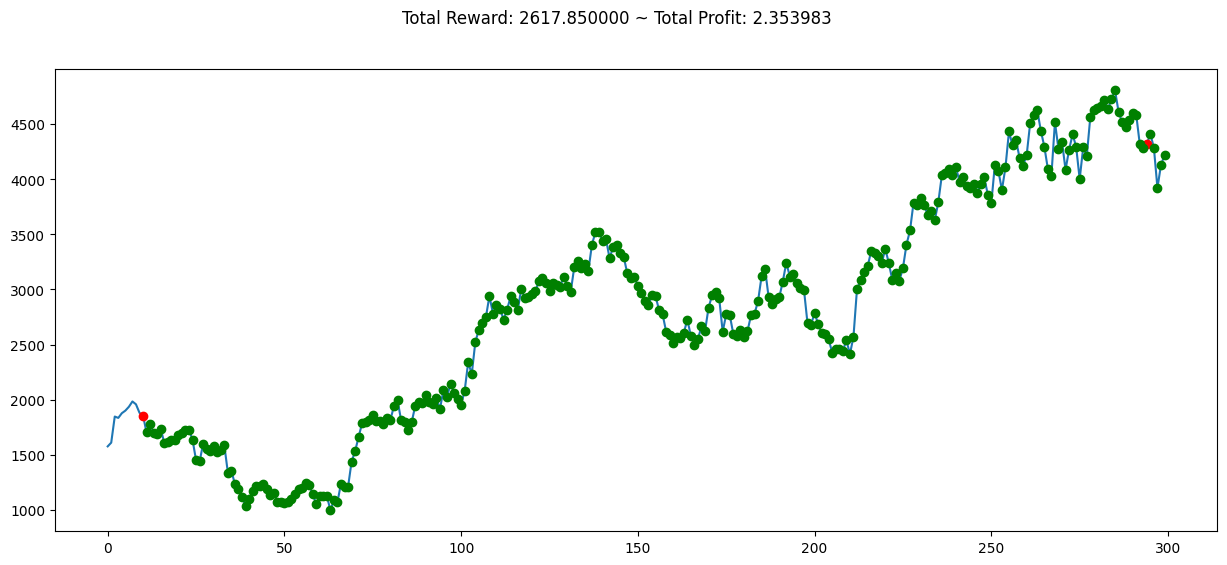

In [20]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()